# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [23]:
iris = datasets.load_iris()
print(iris.DESCR)
print(iris)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [8]:
print(iris.keys())
print(iris['filename'])
print(iris.data[0:10])
print(type(iris.data))
print(iris.target_names)
print(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
# we only take the first two features. 
X = iris.data[:,:2]
print(X.shape)

Y = iris.target
print(Y.shape)

(150, 2)
(150,)


In [13]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [14]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
#建立Target欄位與資料
y = pd.DataFrame(iris['target'], columns=['target'])
y.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [19]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x,y],axis=1)
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [25]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data
print(iris['data'].size/len(iris['feature_names']))

150.0


## 切分訓練集與測試集
> train_test_split()

In [84]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(iris_data[['sepal length (cm)','petal length (cm)']],iris_data[['target']],test_size=0.2)

In [85]:
X_train.head()
X_train.shape

(80, 2)

In [86]:
X_test.head()


,sepal length (cm),petal length (cm)
87,6.3,4.4
60,5.0,3.5
39,5.1,1.5
65,6.7,4.4
92,5.8,4.0


In [87]:
Y_train.head()

,target
5,0
14,0
26,0
1,0
6,0


In [46]:
Y_test.head()

,target
71,1
74,1
49,0
91,1
95,1


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [106]:
def norm_stats(dfs):
    minimum = np.min(dfs,axis=0)
    maximum = np.max(dfs,axis=0)
    mu = np.mean(dfs,axis=0)
    sigma = np.std(dfs,axis=0)
    return (minimum,maximum,mu,sigma)


def z_score(col, stats):
    minimum,maximum,mu,sigma = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/sigma[c]
    return df

In [112]:
stats = norm_stats(X_train)
print(stats)
arr_X_train = np.array(z_score(X_train, stats))

arr_X_train




(sepal length (cm)    4.3
petal length (cm)    1.1
dtype: float64, sepal length (cm)    6.9
petal length (cm)    5.1
dtype: float64, sepal length (cm)    5.44875
petal length (cm)    2.86000
dtype: float64, sepal length (cm)    0.614816
petal length (cm)    1.447204
dtype: float64)


array([[-0.07929204, -0.80154549],
       [ 0.57130935, -1.14703924],
       [-0.72989344, -0.87064424],
       [-0.89254379, -1.00884174],
       [-1.38049483, -1.00884174],
       [ 0.24600865,  0.92592324],
       [-1.70579553, -1.07794049],
       [ 0.0833583 , -1.07794049],
       [ 0.408659  ,  0.85682449],
       [ 1.05926039,  1.20231823],
       [-1.05519413, -0.87064424],
       [-1.21784448, -0.87064424],
       [-0.72989344, -1.14703924],
       [-1.54314518, -1.07794049],
       [-0.56724309, -1.00884174],
       [ 2.19781283,  1.34051573],
       [ 0.0833583 ,  1.06412074],
       [-1.21784448, -1.07794049],
       [-0.56724309, -0.87064424],
       [-1.86844588, -1.21613798],
       [ 1.22191074,  0.99502199],
       [ 1.05926039,  0.78772574],
       [ 0.408659  ,  1.13321949],
       [-1.05519413, -1.00884174],
       [-0.56724309, -1.00884174],
       [ 1.38456109,  1.27141698],
       [ 1.87251214,  1.20231823],
       [ 0.7339597 ,  1.34051573],
       [-0.72989344,

## use sklearn

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.44875 2.86   ]
[0.61481578 1.4472042 ]


In [110]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[-0.07929204, -0.80154549],
       [ 0.57130935, -1.14703924],
       [-0.72989344, -0.87064424],
       [-0.89254379, -1.00884174],
       [-1.38049483, -1.00884174]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [113]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[ 1.38456109  1.06412074]
 [-0.72989344  0.44223199]
 [-0.56724309 -0.93974299]
 [ 2.03516248  1.06412074]
 [ 0.57130935  0.78772574]
 [ 1.87251214  1.06412074]
 [-1.38049483 -1.28523673]
 [-0.72989344 -1.07794049]
 [-1.38049483 -0.93974299]
 [ 0.408659    0.92592324]]


you can also use fit_transform method (i.e., fit and then transform)    

In [114]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[ 1.02976613  1.07914778]
 [-0.77928248  0.4464227 ]
 [-0.64012489 -0.95963304]
 [ 1.58639647  1.07914778]
 [ 0.3339782   0.79793663]
 [ 1.44723888  1.07914778]
 [-1.33591282 -1.31114698]
 [-0.77928248 -1.10023862]
 [-1.33591282 -0.95963304]
 [ 0.19482062  0.93854221]]


In [115]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: 0.0
std of X_train_std: 0.9999999999999999


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    

49.70414038386401
29.91265272149146


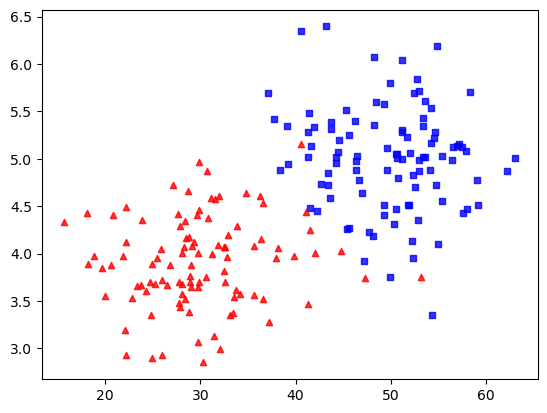

In [116]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [120]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [118]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [121]:
minmax_norm(x_val[:10])

array([0.        , 0.43094928, 0.12572828, 1.        , 0.41913135,
       0.19364538, 0.11352399, 0.70109846, 0.73794222, 0.82182013])

In [122]:
from sklearn.preprocessing import MinMaxScaler
x_val=x_val.reshape(-1, 1)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.data_min_)
print(scaler.transform(x_val)[:10])

[63.0733632]
[15.7096687]
[[0.53942032]
 [0.69158514]
 [0.58381399]
 [0.89251251]
 [0.68741232]
 [0.60779499]
 [0.57950475]
 [0.78697271]
 [0.79998195]
 [0.82959859]]
